# Rate Model of 1 Excitatory and 3 Inhibitory populations
4 Wilson-Cowan style populations with feedforward input from thalamus and recurrent connections.

Following the 2 population model in Natan et al 2015, and 4 population model in Litwin-Kumar et al 2016

Rough outline:
0. Make general model with 4x4 weight matrix
1. Set 2 of the I population weights to 0 and reproduce result from Natan

UPDATE: I'm not sure how much it is worth to try to reproduce this network, because it doesn't easily generalize to the Litwin-Kumar 4 population network. There are some weird specificities in here, like the inhibitory transfer function, and the precomputed input current and opto current. One thing that is probably useful is the synaptic adaptiation. So I'm going to skip directly to the Litwin-Kumar network here.

UPDATE 2: the rate network in Litwin-Kumar is the linearized network...

2. Reproduce steady-state 2 population result from Litwin-Kumar
3. Reproduce steady-state 4 population result from Litwin-Kumar
4. Extend to reproduce experimental findings in Natan

In [13]:
from IPython.display import HTML, IFrame, Image

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os, fnmatch
import time
import h5py
from scipy.signal import find_peaks, peak_prominences
from scipy import stats
from scipy import optimize
from scipy.signal import decimate
from scipy import signal
from scipy import integrate
import seaborn as sns

import gc
import time

%matplotlib inline


from matplotlib import rcParams, cm
rcParams['grid.linewidth'] = 0
rcParams['pdf.fonttype'] = 42
# import custom functions


# import custom functions
from helper_functions import *
import helper_functions

# reload(helper_functions)
# from helper_functions import *
figure_directory = "/home/auguste/Documents/CNE_PhD/organisation/Cajal/Project/code/1E3I/figures/park"
fontsize = 20
axiswidth = 1.5

/home/auguste/Software/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


ModuleNotFoundError: No module named 'helper_functions'

In [10]:
def network(r, t, J, T):    
    drdt = -r + transfer_func(mu(t) + np.dot(J,r))
    return drdt/T

def linear_network(r, t, W, T):    
    # linearized network
    drdt = np.dot(W,r)-r + constant_b(t)
    return drdt/T

def transfer_func(curr_input):
    # transfer function from current to firing rate   
    return curr_input

def transfer_func_park(curr_input,r_max = 100, r_min = 0 ):
    # transfer function from current to firing rate
    if curr_input < r_min:
        curr_input = r_min
    elif curr_input > r_max:
        curr_input = r_max
    return curr_input

def mu(t):
    # time-varying input to the network
    return 0

def constant_b(t):
    # it's a convenient trick so we can index input by time, but it seems
    # the integration is time asynchronous, i.e. at uneven time steps
    return 0
    return np.array([0,0,0,5]).T

def plot_rates(t,r, colorarr):
    c_ord = [0,2,1,4]
    labels = ['E','PV','SOM','VIP']
    for i in range(4):
        plt.plot(t,r[:,i],color = colorarr[i],label=labels[i])
        
    plt.xlabel('Time (s)')
    plt.ylabel('Firing Rate (Hz)')
    plt.legend()

In [11]:
color = ["midnightblue","darkgreen","darkorange","purple"]

r0 = np.array([4,9,5,3]).T
T, dt = 0.5, 0.001
t = np.arange(0,T,dt)
W_EE = 0.8
W = np.array([[W_EE, -1, -1, 0],
              [1, -1, -0.5, 0],
              [1, 0, 0, -0.25],
              [1, 0, -0.6, 0]])


taus = np.array([0.02, 0.02, 0.02, 0.02]).T
r = integrate.odeint(linear_network, r0, t, args=(W, taus))

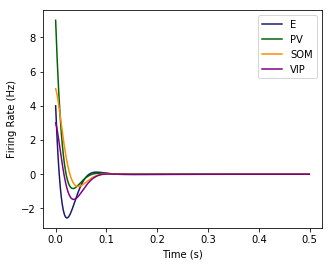

In [12]:
plt.figure(figsize=(5,4))
plot_rates(t,r,color)

In [1]:
#fig = plt.figure(figsize=(4,3))
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(5,10))
fig.subplots_adjust(wspace=0.2)
axiswidth = 1.5

ylabel = r"$V $ [mV]"
xlabel ="time [ms]"


for axis in ['bottom','left']:
    ax1.spines[axis].set_linewidth(axiswidth)
ax1.xaxis.set_tick_params(width=axiswidth)
ax1.yaxis.set_tick_params(width=axiswidth)
for axis in ['top','right']:
    ax1.spines[axis].set_linewidth(0)
ax1.plot(t, v, lw = 3, c = "darkblue")
#plt.plot(t,gi, label="I input", lw = 3, c = "darkred")

#ax1.set_xlabel(xlabel, fontsize = fontsize)
ax1.set_ylabel(ylabel, fontsize = fontsize)


for label in (ax1.get_yticklabels()):
        label.set_fontsize(fontsize)
for label in (ax1.get_xticklabels()):
        label.set_fontsize(fontsize)

        
ylabel = "gating vatiables"
xlabel ="time [ms]"


for axis in ['bottom','left']:
    ax2.spines[axis].set_linewidth(axiswidth)
ax2.xaxis.set_tick_params(width=axiswidth)
ax2.yaxis.set_tick_params(width=axiswidth)
for axis in ['top','right']:
    ax2.spines[axis].set_linewidth(0)
ax2.plot(t, n, label = 'n',lw = 3, c = "darkgreen")
ax2.plot(t, h, label = 'h',lw = 3, c = "magenta")
ax2.plot(t, m, label = 'm',lw = 3, c = "darkorange")

#plt.plot(t,gi, label="I input", lw = 3, c = "darkred")

#ax2.set_xlabel(xlabel, fontsize = fontsize)
ax2.set_ylabel(ylabel, fontsize = fontsize)
ax2.legend(fontsize = fontsize)

for label in (ax2.get_yticklabels()):
        label.set_fontsize(fontsize)
for label in (ax2.get_xticklabels()):
        label.set_fontsize(fontsize)

ylabel = "I [nA]"
xlabel ="time [ms]"


for axis in ['bottom','left']:
    ax3.spines[axis].set_linewidth(axiswidth)
ax3.xaxis.set_tick_params(width=axiswidth)
ax3.yaxis.set_tick_params(width=axiswidth)
for axis in ['top','right']:
    ax3.spines[axis].set_linewidth(0)

ax3.plot(t, I_ex, label="E input", lw = 3, c = "darkred")

ax3.set_xlabel(xlabel, fontsize = fontsize)
ax3.set_ylabel(ylabel, fontsize = fontsize)

for label in (ax3.get_yticklabels()):
        label.set_fontsize(fontsize)
for label in (ax3.get_xticklabels()):
        label.set_fontsize(fontsize)
plt.tight_layout()
save_fig(figure_directory, "HH_model")

hello


In [ ]:
figsize=(5, 4)
ylabel = r"y"
xlabel =r"x"

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
axiswidth = 1.5
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(axiswidth)
ax.xaxis.set_tick_params(width=axiswidth)
ax.yaxis.set_tick_params(width=axiswidth)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
plt.plot(x,z, lw = 3, c = "darkblue", label="k = 10")
plt.plot(x,y, lw = 3, c = "darkred", label="k = 1")

for q in steps:
    plt.axhline(y=q, c="grey")
plt.xlabel(xlabel, fontsize = fontsize)
plt.ylabel(ylabel, fontsize = fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.legend(fontsize = fontsize)

plt.tight_layout()

save_fig(figure_directory, "sigmoid_xy")